In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
# num of modules
num_of_m = [7,7,8,8,8,8,4,6,9,6,6,7,7,6,7,6,10,8,10,9,8,9,8,7,6,8,7,8,9,6]
group = ['Mild','Mild','Severe','Severe','Severe','Severe','Mild','Severe','Severe','Mild','Severe','Severe','Mild','Severe','Mild',\
    'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control',\
    'Control','Control','Control','Control','Control'];
num_of_modules = {}
num_of_modules['Group'] =  group
num_of_modules['Num of modules'] = num_of_m

num_of_modules_df = pd.DataFrame(num_of_modules)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.


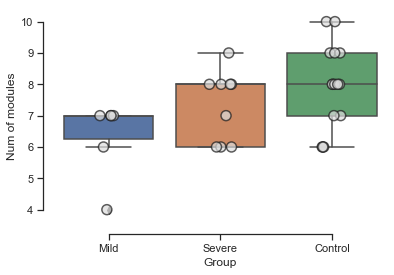

In [57]:
sns.set_style("ticks")

sns.boxplot(x="Group", y="Num of modules",
#             hue="Age",
#             capsize=.1,
            
            data = num_of_modules_df
           )

ax = sns.stripplot(x="Group", y="Num of modules",
#             hue="Age", 
              #color="whitesmoke", 
              jitter=True,
              palette=["gainsboro","gainsboro"],
              #palette="Set2",
#               split=True,
#                    dodge = True,
              data = num_of_modules_df,
                   size = 10,
              edgecolor = 'k',
              linewidth = 1.5,
              alpha =0.7
             )

sns.despine(offset=10, trim=True)

handles, labels = ax.get_legend_handles_labels()
plt.savefig('D:\\Desktop\\EMBC2022\\Numofmodules.png', dpi=500, bbox_inches='tight')

# Fraction

In [54]:
# [1 for i in range(62)]

In [10]:
groupid = ["Younger"]*34+["Elder"]*28+["Younger"]*34+["Elder"]*28+["Younger"]*34+["Elder"]*28+["Younger"]*34+["Elder"]*28
# groupid = np.expand_dims(groupid,1)
state_id= ["1"]*34+["1"]*28+["2"]*34+["2"]*28+["3"]*34+["3"]*28+["4"]*34+["4"]*28
# state_id = np.expand_dims(state_id,1)

In [4]:
# state_id 
fraction_state

NameError: name 'fraction_state' is not defined

In [7]:
# all_state_f
# all_state_f
f_state.shape
t,p = stats.ttest_ind(a, b)

NameError: name 'a' is not defined

In [11]:
f_state = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\frac_time_state.txt')


all_state_f = list(f_state.reshape(1,4*62)[0])

fraction_time = {}
fraction_time['Age'] = list(groupid)
fraction_time['State'] = list(state_id)
fraction_time['Fraction'] = all_state_f
fraction_time = pd.DataFrame(fraction_time)

# fraction_time = np.concatenate([groupid,state_id,all_state_f],1)

In [12]:
fraction_time_df =  pd.DataFrame(fraction_time,columns = ['Age','State','Fraction'])

In [13]:
fraction_time_df

,Age,State,Fraction
0,Younger,1,0.000000
1,Younger,1,1.000000
2,Younger,1,0.000000
3,Younger,1,0.000000
4,Younger,1,0.000000
...,...,...,...
243,Elder,4,0.109434
244,Elder,4,0.049057
245,Elder,4,0.000000
246,Elder,4,0.950943


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_Younger v.s. 2_Elder: Custom statistical test, P_val:2.000e-04
3_Younger v.s. 3_Elder: Custom statistical test, P_val:2.000e-04


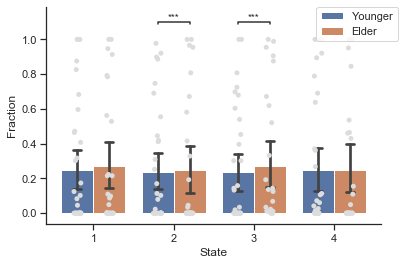

In [19]:
# fig,ax = plt.subplots(figsize=(100,100),dpi=300,facecolor="w")

sns.set_style("ticks")

sns.barplot(x="State", y="Fraction",
            hue="Age",
            capsize=.1,
            #estimator= np.mean,
            #ci="sd",
            #errcolor="k",
            #palette='Set2',
            #hue="Patient_status", kind="bar",  palette=["silver", "salmon", "darkred"],
            #palette="Set2",
            data = fraction_time_df)

ax = sns.stripplot(x="State", y="Fraction",
            hue="Age", 
              #color="whitesmoke", 
              jitter=True,
              palette=["gainsboro","gainsboro"],
              #palette="Set2",
#               split=True,
                   dodge = True,
              data = fraction_time_df
             )

sns.despine(ax =ax)

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 1), loc= 1, borderaxespad=0.)

pairs= [
        (("2","Younger"),("2","Elder")),\
        (("3","Younger"),("3","Elder")),\
    ]
# test = ttest_ind(permutations=5000)
add_stat_annotation(ax, box_pairs = pairs, data = fraction_time_df,
                    #test='t-test_ind',
                    perform_stat_test=False, 
                    pvalues=[0.000199960007998400,0.000199960007998400],
                    line_offset_to_box= 0.08, line_offset=0.01, line_height=0.01, text_offset=0.08,
                    loc='inside',x="State", y="Fraction",hue ='Age',verbose=2)
# plt.legend(loc='upper left')
# annotator.configure(, text_format='star',line_height=0.03,line_widh=1)
# annotator.apply_and_annotate()
plt.savefig('fraction2.png', dpi=300, bbox_inches='tight')

## MDT

In [20]:
mdt = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\mean_dwell_time.txt')
all_state_mdt = list(f_state.reshape(1,4*62)[0])

MDT = {}
MDT['Age'] = list(groupid)
MDT['State'] = list(state_id)
MDT['Dwell time'] = all_state_mdt
all_state_mdt_df = pd.DataFrame(MDT)

In [21]:
all_state_mdt_df

,Age,State,Dwell time
0,Younger,1,0.000000
1,Younger,1,1.000000
2,Younger,1,0.000000
3,Younger,1,0.000000
4,Younger,1,0.000000
...,...,...,...
243,Elder,4,0.109434
244,Elder,4,0.049057
245,Elder,4,0.000000
246,Elder,4,0.950943


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2_Younger v.s. 2_Elder: Custom statistical test, P_val:2.000e-04
3_Younger v.s. 3_Elder: Custom statistical test, P_val:0.000e+00


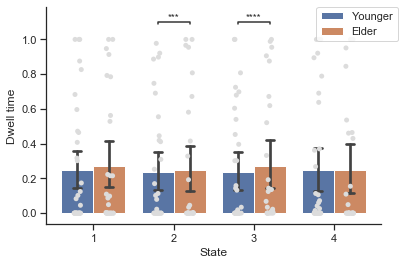

In [25]:
sns.set_style("ticks")
sns.stripplot(x="State", y="Dwell time",
            hue="Age", 
              #color="whitesmoke", 
              jitter=True,
              palette=["gainsboro","gainsboro"],
              #palette="Set2",
              dodge=True,
              data = all_state_mdt_df,
             )
ax =sns.barplot(x="State", y="Dwell time",
            hue="Age",
            capsize=.1,
            #estimator= np.mean,
            #ci="sd",
            #errcolor="k",
            #palette='Set2',
            #hue="Patient_status", kind="bar",  palette=["silver", "salmon", "darkred"],
            #palette="Set2",
            data = all_state_mdt_df)
sns.despine(ax =ax)

handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 1), loc= 1, borderaxespad=0.)

pairs= [
        (("2","Younger"),("2","Elder")),\
        (("3","Younger"),("3","Elder")),\
    ]
# test = ttest_ind(permutations=5000)
add_stat_annotation(ax, box_pairs = pairs, data = all_state_mdt_df,
                    #test='t-test_ind',
                    perform_stat_test=False, 
                    pvalues=[0.000199960007998400,0.0000],
                    line_offset_to_box= 0.08, line_offset=0.01, line_height=0.01, text_offset=0.08,
                    loc='inside',x="State", y="Dwell time",hue ='Age',verbose=2)
plt.savefig('MDT2.png', dpi=300, bbox_inches='tight')

# Num transition

In [26]:
nt = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\num_transitions.txt')
all_state_nt = list(nt.reshape(1,62)[0])
nt_groupid = ['Younger']*34 +['Elder']*28
nt = {}
nt['Age'] = list(nt_groupid)
nt['Transitions'] = all_state_nt
all_state_nt_df = pd.DataFrame(nt)

In [301]:
# all_state_nt_df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  


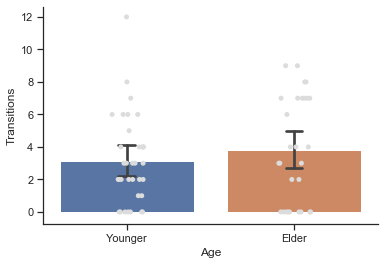

In [36]:
sns.set_style("ticks")
sns.stripplot(x="Age", y="Transitions", 
              #color="whitesmoke", 
              jitter=True,
              palette=["gainsboro","gainsboro"],
              #palette="Set2",
#               dodge = True,
              data = all_state_nt_df,
             )
ax =sns.barplot(x="Age", y="Transitions",
#             hue="Age",
            capsize=.1,
            #estimator= np.mean,
            #ci="sd",
            #errcolor="k",
            #palette='Set2',
            #hue="Patient_status", kind="bar",  palette=["silver", "salmon", "darkred"],
#             #palette="Set2",
#                 dodge = True,
            data = all_state_nt_df)
sns.despine(ax =ax)


handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 1), loc= 1, borderaxespad=0.)
plt.savefig('NT2.png', dpi=300, bbox_inches='tight')

## TMP

In [19]:
TMP_p = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Transitions_p.txt')
TMP_d = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Transitions_d.txt')

In [22]:
TMP_d
TMP_p[TMP_p>0.05]=1
state_sign = np.sign(TMP_d)
state_p3 = -1*state_sign*np.log10(TMP_p)

In [23]:
state_p3

array([[ 0.        , -0.        ,  1.41802348, -0.        ],
       [-0.        ,  0.        ,  3.39802685,  0.        ],
       [ 3.09699686,  2.44378435, -3.69905685, -0.        ],
       [-0.        ,  0.        ,  1.78524299,  0.        ]])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


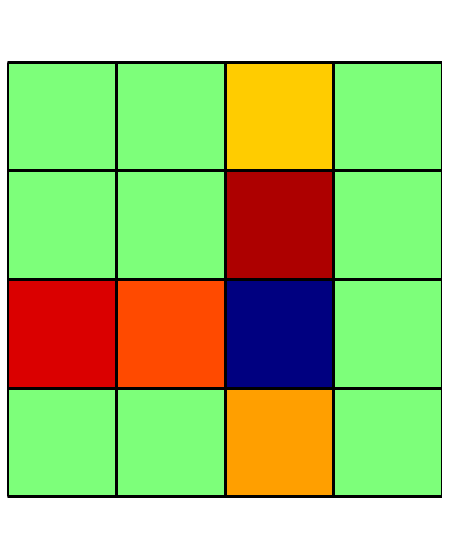

In [27]:
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(state_p3, cmap= jet, 
                      #vmax=0.75,vmin=-0.75, 
                      center=0,
            square = True,linewidths=.5,cbar =False, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

ax.tick_params(labelsize=6)
ax.hlines([0,1,2,3,4], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([0,1,2,3,4], *ax.get_xlim(), colors='black', linewidth=3)
myfig = heatmap.get_figure()

myfig =heatmap.get_figure()
myfig.savefig("TransitionsMwithoutbar.png",bbox_inches='tight', pad_inches=0, dpi=300)
myfig.show()

In [323]:
a = (1
,1
,0.301886790000000
,1
,0.464150940000000
,0.826415090000000,
0.124528300000000
,0.683018870000000
,0.471698110000000
,1
,0.00377358490000000
,0.562264150000000
,1
,0.913207550000000
,0.792452830000000
,0.784905660000000
,0.445283020000000
,0.886792450000000
,0.747169810000000
,0.411320750000000
,0.309433960000000
,0.977358490000000
,0.920754720000000
,0.898113210000000
,0.954716980000000
,0.807547170000000
,0.966037740000000
,0.415094340000000
,1
,1
,0.328301890000000
,0.539622640000000
,0.698113210000000
,0.603773580000000)
b = (0.158490570000000
,0
,0
,0.143396230000000
,0.301886790000000
,0
,0.00377358490000000
,0.124528300000000
,0.0679245280000000
,0.988679250000000
,0.0113207550000000
,0.671698110000000
,0.618867920000000
,0.267924530000000
,0
,1
,0.00377358490000000
,0.637735850000000
,0
,0.0264150940000000
,0.105660380000000
,0.845283020000000
,0
,0
,0
,0
,0.460377360000000
,0)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=6.033835620564129, pvalue=1.0786739746297024e-07)

In [8]:
a = np.ones([756,9,126])
b = a.flatten()
b.shape # (857304,)
c = b.reshape([756,9*126])
c.shape 

(756, 1134)